In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
pwd

'/Users/sanju/Documents/DS/Generative AI/LSTM_RNN/notebook'

In [4]:
os.chdir("..")

In [5]:
pwd

'/Users/sanju/Documents/DS/Generative AI/LSTM_RNN'

In [6]:
!pip install tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
with open("data/hamlet.txt","r") as f:
  data=f.read()

In [10]:
data

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get thee to bed Francisco\n\n   Fran. For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn. Haue you had quiet Guard?\n  Fran. Not a Mouse stirring\n\n   Barn. Well, goodnight. If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.\nEnter Horatio and Marcellus.\n\n  Fran. I thinke I heare them. Stand: who's there?\n  Hor. Friends to this ground\n\n   Mar. And Leige-men to the Dane\n\n   Fran. Giue you good night\n\n   Mar. O farwel honest Soldier, who hath relieu'd you?\n  Fra. Barnardo ha's my place: giue you goodnight.\n\nExit Fran.\n\n  Mar. Holla Barnardo\n\n   Bar. 

In [11]:
len(data)

162881

In [12]:
data.split("\n")

['[The Tragedie of Hamlet by William Shakespeare 1599]',
 '',
 '',
 'Actus Primus. Scoena Prima.',
 '',
 'Enter Barnardo and Francisco two Centinels.',
 '',
 "  Barnardo. Who's there?",
 '  Fran. Nay answer me: Stand & vnfold',
 'your selfe',
 '',
 '   Bar. Long liue the King',
 '',
 '   Fran. Barnardo?',
 '  Bar. He',
 '',
 '   Fran. You come most carefully vpon your houre',
 '',
 "   Bar. 'Tis now strook twelue, get thee to bed Francisco",
 '',
 "   Fran. For this releefe much thankes: 'Tis bitter cold,",
 'And I am sicke at heart',
 '',
 '   Barn. Haue you had quiet Guard?',
 '  Fran. Not a Mouse stirring',
 '',
 '   Barn. Well, goodnight. If you do meet Horatio and',
 'Marcellus, the Riuals of my Watch, bid them make hast.',
 'Enter Horatio and Marcellus.',
 '',
 "  Fran. I thinke I heare them. Stand: who's there?",
 '  Hor. Friends to this ground',
 '',
 '   Mar. And Leige-men to the Dane',
 '',
 '   Fran. Giue you good night',
 '',
 "   Mar. O farwel honest Soldier, who hath reli

In [13]:
tokenizer=Tokenizer()

In [14]:
len(data.split("\n"))

4923

In [15]:
tokenizer.fit_on_texts(data.split("\n "))

In [16]:
tokenizer

In [17]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [18]:
## now need to convert the all the data into the word index using the help of tokenizer


In [19]:
corpus=[]
for i in data.split("\n"):
  print(i)
  word_index=tokenizer.texts_to_sequences([i])
  print(word_index[0])
  if len(word_index[0])>0:
    corpus.append(word_index[0])

[The Tragedie of Hamlet by William Shakespeare 1599]
[1, 687, 4, 45, 41, 1886, 1887, 1888]

[]

[]
Actus Primus. Scoena Prima.
[1180, 1889, 1890, 1891]

[]
Enter Barnardo and Francisco two Centinels.
[57, 407, 2, 1181, 177, 1892]

[]
  Barnardo. Who's there?
[407, 1182, 63]
  Fran. Nay answer me: Stand & vnfold
[408, 162, 377, 21, 247, 882]
your selfe
[18, 66]

[]
   Bar. Long liue the King
[451, 224, 248, 1, 30]

[]
   Fran. Barnardo?
[408, 407]
  Bar. He
[451, 25]

[]
   Fran. You come most carefully vpon your houre
[408, 6, 43, 62, 1893, 96, 18, 566]

[]
   Bar. 'Tis now strook twelue, get thee to bed Francisco
[451, 71, 51, 1894, 567, 378, 80, 3, 273, 1181]

[]
   Fran. For this releefe much thankes: 'Tis bitter cold,
[408, 20, 16, 1895, 114, 379, 71, 883, 491]
And I am sicke at heart
[2, 5, 92, 688, 58, 144]

[]
   Barn. Haue you had quiet Guard?
[346, 29, 6, 108, 568, 884]
  Fran. Not a Mouse stirring
[408, 14, 7, 885, 1896]

[]
   Barn. Well, goodnight. If you do meet Horatio an

In [20]:
len(corpus)

3966

In [21]:
corpus[-1]

[4817, 1, 687, 4, 45, 1047, 4, 193]

In [22]:
tokenizer.sequences_to_texts([corpus[5]])

['your selfe']

In [23]:
total_words=len(tokenizer.word_index)+1

In [24]:
max_sentence_len=max([len(i) for i in corpus])

In [25]:
max_sentence_len

14

In [26]:
#now time to equal the lenght of each sentence using the padding
sequenced_data=np.array(pad_sequences(corpus,maxlen=max_sentence_len,padding="pre"))
sequenced_data

array([[   0,    0,    0, ..., 1886, 1887, 1888],
       [   0,    0,    0, ..., 1889, 1890, 1891],
       [   0,    0,    0, ..., 1181,  177, 1892],
       ...,
       [   0,    0,    0, ..., 4816,   36,  757],
       [   0,    0,    0, ...,    0,    0,  211],
       [   0,    0,    0, ..., 1047,    4,  193]], dtype=int32)

In [27]:
## make the x and y
X=sequenced_data[:,:-1]
y=sequenced_data[:,-1]
# Convert y to categorical (one-hot encoding)
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [28]:
## as the sequence data is ready now time to split the dat ainto the train test
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
## as the data has been splited now time to train the model
model=Sequential()
model.add(Embedding(input_dim=total_words,output_dim=100))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(70))
model.add(Dropout(0.2))
model.add(Dense(total_words,activation="softmax"))

# Explicitly build the model
model.build(input_shape=(None, max_sentence_len-1))

#now compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 13, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 13, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 70)             │        61,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4818)           │       342,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,036,358 (3.95 MB)

 Trainable params: 1,036,358 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="val_loss",patience=5,verbose=1,restore_best_weights=True)

In [31]:
## now time to train the model
history=model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_test,y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0220 - loss: 8.1479 - val_accuracy: 0.0277 - val_loss: 7.6523
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0227 - loss: 7.0155 - val_accuracy: 0.0277 - val_loss: 7.7958
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0300 - loss: 6.8236 - val_accuracy: 0.0277 - val_loss: 7.8567
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0313 - loss: 6.6566 - val_accuracy: 0.0277 - val_loss: 8.0359
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0306 - loss: 6.6095 - val_accuracy: 0.0277 - val_loss: 8.2656
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0303 - loss: 6.4954 - val_accuracy: 0.0302 - val_loss: 8.1823
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0256 - loss: 6.4868 - val_accuracy: 0.0290 - val_loss: 8.4092
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0283 - loss: 6.3450 - val_accu

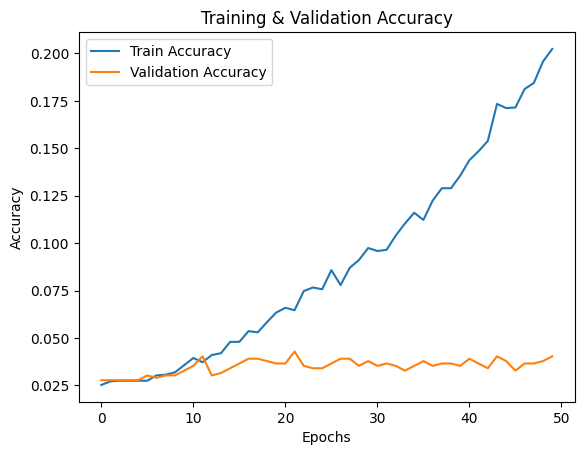

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

In [33]:
def predict_next_word(model,tokenizer,max_sentence_len):
  pass

In [34]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [36]:
import pickle
with open("tokenizer.pkl","wb") as f:
    pickle.dump(tokenizer,f)

In [37]:
model.save("model.h5")

In [38]:
new_sent=["great "]
tokenized_sentence=tokenizer.texts_to_sequences(new_sent)
sequenced_new_sent=pad_sequences(tokenized_sentence,maxlen=max_sentence_len,padding="pre")

In [39]:
model.predict(sequenced_new_sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[1.0109546e-06, 6.6648128e-05, 8.6742693e-05, ..., 1.0040914e-06,
        1.0904413e-06, 1.1205379e-06]], dtype=float32)

In [40]:
len(model.predict(sequenced_new_sent)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


4818

In [41]:
predicted_probs=model.predict(sequenced_new_sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [42]:
np.argmax(model.predict(sequenced_new_sent))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


np.int64(630)

In [43]:
predicted_index = np.argmax(predicted_probs, axis=-1)[0]

In [44]:
predicted_index

np.int64(630)

In [45]:
for value,index in tokenizer.word_index.items():
  if index==predicted_index:
    print(value)

prison


In [46]:
def next_word_prediction(new_sentence,model,tokenizer,max_length):
  print(new_sentence)
  tokenized_sentence=tokenizer.texts_to_sequences([new_sentence])
  sequenced_new_sent=pad_sequences(tokenized_sentence,maxlen=max_length,padding="pre")
  predicted_probabilities_values=model.predict(sequenced_new_sent)
  predicted_index = np.argmax(predicted_probabilities_values, axis=-1)[0]
  print(predicted_index)
  for value,index in tokenizer.word_index.items():
    if index==predicted_index:
      next_word=value

  print(next_word)
  complete_sent=new_sentence+" "+next_word
  return complete_sent

In [47]:
next_word_prediction("you're ",model,tokenizer,max_length=14)

you're 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
175
exeunt


"you're  exeunt"

In [48]:
from tensorflow.keras.models import load_model
new_model=load_model("model.h5")

In [49]:
with open("tokenizer.pkl","rb") as f:
    new_tokenizer=pickle.load(f)


In [51]:
next_word_prediction("this is my best last",new_model,new_tokenizer,14)

this is my best last
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
135
soule


'this is my best last soule'